<a href="https://colab.research.google.com/github/gilboaerel/HW_AI_COURSE_EREL/blob/main/HW_1_Erel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

i want you to be today a programer that know how to code with python and expert in using google colab

i want you to create an array 250 on 250 that include a cube sized 50 on 50 in the center of the array that all have the value 100, also i want all the other fields in the array to fill with 0. and for ending i want you to print me an image in "gray level image" with the scale 0-255 that 0 is black and white is 255.  

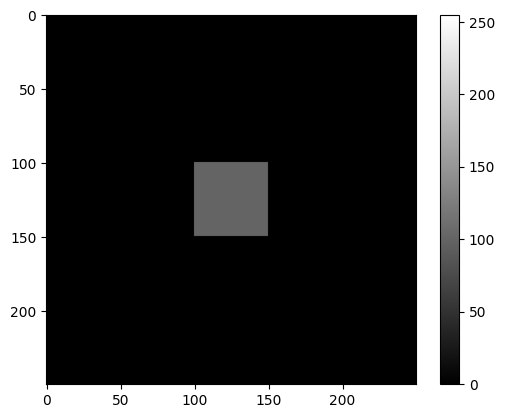

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 250x250 array filled with zeros
array_size = 250
image_array = np.zeros((array_size, array_size), dtype=np.uint8)

# Define the dimensions of the cube (50x50) and its value
cube_size = 50
cube_value = 100

# Calculate the indices to place the cube in the center of the array
start_row = (array_size - cube_size) // 2
end_row = start_row + cube_size
start_col = (array_size - cube_size) // 2
end_col = start_col + cube_size

# Fill the center of the array with the cube value
image_array[start_row:end_row, start_col:end_col] = cube_value

# Display the resulting image
plt.imshow(image_array, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()


Now I would like you to create a video where you see the cube we created descend at a 45 angle downward from the top left corner to the bottom right corner.

In [2]:
import cv2
import numpy as np

# Parameters
array_size = 250
cube_size = 50
cube_value = 100

# Create a video writer object
video_writer = cv2.VideoWriter('cube_descent.avi', cv2.VideoWriter_fourcc(*'XVID'), 20, (array_size, array_size))

# Create frames for the video
for i in range(array_size - cube_size + 1):
    # Create a new frame
    frame = np.zeros((array_size, array_size), dtype=np.uint8)

    # Calculate the position of the cube based on the iteration
    start_row = i
    end_row = start_row + cube_size
    start_col = i
    end_col = start_col + cube_size

    # Fill the cube in the frame
    frame[start_row:end_row, start_col:end_col] = cube_value

    # Write the frame to the video
    video_writer.write(cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR))

# Release the video writer
video_writer.release()

print("Video created successfully.")


Video created successfully.


Now I need you to create a tracker that will follow the cube and mark it for every frame,  I want you to write code that will receive as input the video we created and as output output a video where the cube is surrounded for the entire length of the video. note that the starting place of the cube is (0,0).

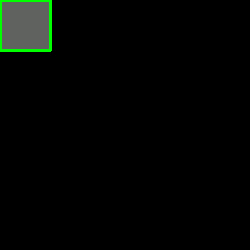

Tracking completed. Output video saved as tracked_cube.avi


In [3]:
import cv2
from google.colab.patches import cv2_imshow

# Function to create a video with the tracked cube
def track_cube(input_video, output_video):
    # Open the input video
    cap = cv2.VideoCapture(input_video)

    # Get the first frame
    ret, frame = cap.read()

    # Define the region of interest (ROI) around the cube in the first frame
    roi = (0, 0, 50, 50)  # x, y, width, height

    # Display the initial frame with the specified ROI
    init_frame = frame.copy()
    cv2.rectangle(init_frame, (roi[0], roi[1]), (roi[0] + roi[2], roi[1] + roi[3]), (0, 255, 0), 2)
    cv2_imshow(init_frame)

    # Initialize the tracker with the first frame and ROI
    tracker = cv2.TrackerKCF_create()
    tracker.init(frame, (roi[0], roi[1], roi[2], roi[3]))

    # Get video properties
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    # Create a video writer object for the output video
    video_writer = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'XVID'), 20, (frame_width, frame_height))

    while True:
        # Read a new frame
        ret, frame = cap.read()

        if not ret:
            break

        # Update the tracker
        success, roi = tracker.update(frame)

        if success:
            # Convert the coordinates to integers
            roi = tuple(map(int, roi))

            # Draw a rectangle around the tracked cube
            cv2.rectangle(frame, (roi[0], roi[1]), (roi[0] + roi[2], roi[1] + roi[3]), (0, 255, 0), 2)

        # Write the frame to the output video
        video_writer.write(frame)

    # Release the video writer and capture objects
    video_writer.release()
    cap.release()

    print("Tracking completed. Output video saved as", output_video)

# Call the function with the input and output video filenames
track_cube("cube_descent.avi", "tracked_cube.avi")



Now I want you to print below the cube the coordinates of the center of the cube in every frame of the video.

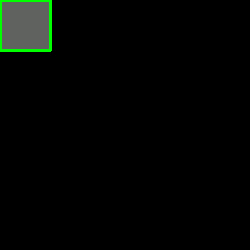

Tracking completed. Output video saved as tracked_cube_with_coordinates.avi


In [4]:
import cv2
from google.colab.patches import cv2_imshow

# Function to create a video with the tracked cube and print coordinates
def track_cube(input_video, output_video):
    # Open the input video
    cap = cv2.VideoCapture(input_video)

    # Get the first frame
    ret, frame = cap.read()

    # Define the initial position of the cube in the first frame
    initial_position = (0,0, 50, 50)  # x, y, width, height

    # Display the initial frame with the specified initial position
    init_frame = frame.copy()
    cv2.rectangle(init_frame, (initial_position[0], initial_position[1]),
                  (initial_position[0] + initial_position[2], initial_position[1] + initial_position[3]), (0, 255, 0), 2)
    cv2_imshow(init_frame)

    # Initialize the tracker with the first frame and initial position
    tracker = cv2.TrackerKCF_create()
    tracker.init(frame, tuple(initial_position))

    # Get video properties
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    # Create a video writer object for the output video
    video_writer = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'XVID'), 20, (frame_width, frame_height))

    while True:
        # Read a new frame
        ret, frame = cap.read()

        if not ret:
            break

        # Update the tracker
        success, roi = tracker.update(frame)

        if success:
            # Convert the coordinates to integers
            roi = tuple(map(int, roi))

            # Draw a rectangle around the tracked cube
            cv2.rectangle(frame, (roi[0], roi[1]), (roi[0] + roi[2], roi[1] + roi[3]), (0, 255, 0), 2)

            # Calculate the center coordinates of the tracked cube
            center_x = roi[0] + roi[2] // 2
            center_y = roi[1] + roi[3] // 2

            # Print the center coordinates below the cube
            cv2.putText(frame, f"Center: ({center_x}, {center_y})", (roi[0], roi[1] + roi[3] + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # Write the frame to the output video
        video_writer.write(frame)

    # Release the video writer and capture objects
    video_writer.release()
    cap.release()

    print("Tracking completed. Output video saved as", output_video)

# Call the function with the input and output video filenames
track_cube("cube_descent.avi", "tracked_cube_with_coordinates.avi")
